## Target Obs Stratgey



> First, we need to import some packages in Julia

In [56]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)
using CarbonI
using TimeSeries, Dates

  Activating project at `~/code/gitHub/CarbonI`


In [26]:
using XLSX, DataFrames, Dates, CairoMakie

# Read the Excel data
filename = "../../data/target_schedule_jun_cap7days.xlsx"
sheetname = "target_schedule_jun_avail"
# The readtable function returns a tuple; we convert it to a DataFrame.
data = DataFrame(XLSX.readtable(filename, sheetname))

Row,Target Area Name,Start Time,Stop Time,Duration,Pass,Roll Angle
,Any,Any,Any,Any,Any,Any
1,Darwin_Australia,2031-06-14T03:15:52,2031-06-14T03:18:34,162,3,41.4548
2,Permafrost_Russia,2031-06-14T03:34:30,2031-06-14T03:37:12,162,3,25.8299
3,South_Sumatra,2031-06-14T04:56:23,2031-06-14T04:59:05,162,4,38.7464
4,Bangladesh,2031-06-14T05:04:37,2031-06-14T05:07:19,162,4,20.7071
5,Congo_Basin,2031-06-14T09:52:14,2031-06-14T09:54:56,162,7,42.4565
6,Sudd_Wetlands,2031-06-14T09:53:40,2031-06-14T09:56:22,162,7,49.4133
7,Brazil,2031-06-14T14:40:54,2031-06-14T14:43:36,162,10,4.40833
8,State_of_Para_Brazil,2031-06-14T14:46:00,2031-06-14T14:48:42,162,10,43.8914
9,Bolovia_Wetlands,2031-06-14T16:20:08,2031-06-14T16:22:50,162,11,40.464


In [36]:
# Convert the Overpass_Time column to DateTime objects.
# Adjust the date format string as needed to match your data.
data.Overpass_Time = DateTime.(data[!,"Start Time"]);

In [66]:
data.Overpass_Time
Day_Of_Year = dayofyear.(data.Overpass_Time)

214-element Vector{Int64}:
 165
 165
 165
 165
 165
 165
 165
 165
 165
 165
   ⋮
 178
 178
 178
 178
 178
 178
 178
 178
 178

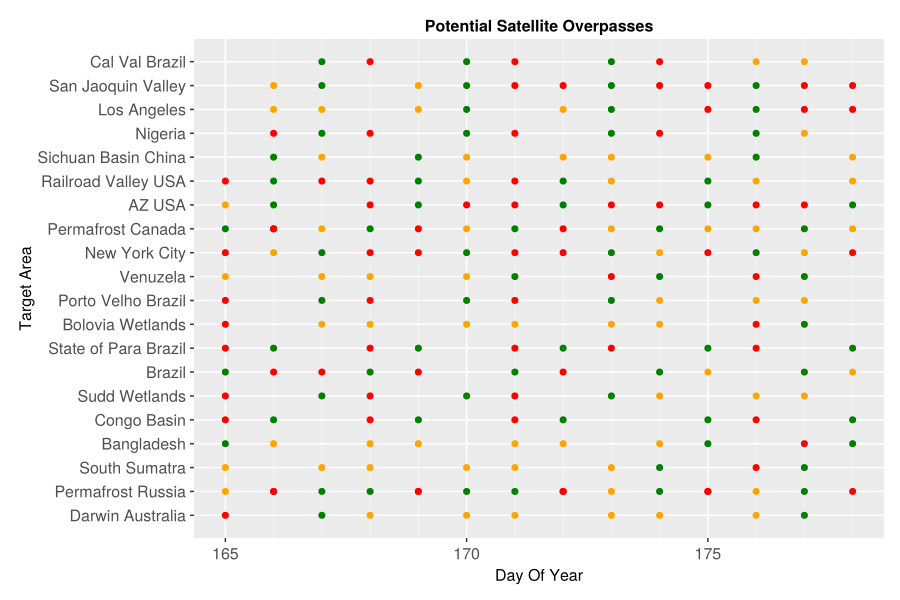

In [87]:

set_theme!(theme_ggplot2())
# Create a mapping for Target Area names to numeric indices for plotting.
targets = data[!,"Target Area Name"]
rollAngles = convert.(Float64,data[!,"Roll Angle"])
areas = unique(targets)
areas_space = [replace(c, "_" => " ") for c in areas]
area_index = Dict(area => i for (i, area) in enumerate(areas))
data[!, :Area_Index] = [area_index[area] for area in targets]

function get_color(roll)
    if roll < 25
        return :green
    elseif roll < 40
        return :orange
    else
        return :red
    end
end

colors_ = get_color.(rollAngles)
#ta = TimeArray(data.Overpass_Time,  data.Area_Index)
#@show ta
#@show data.Overpass_Time
#@show data.Area_Index

# Create the scatter plot using CairoMakie
fig = Figure(resolution = (900, 600))
ax = Axis(fig[1, 1],
    xlabel = "Day Of Year",
    ylabel = "Target Area",
    yticks = (1:length(areas), areas_space),
    xminorgridvisible = true,xminorticks = IntervalsBetween(5),yminorgridvisible=false,
    title = "Potential Satellite Overpasses")

# Create scatter plot: x-axis is Overpass_Time, y-axis is Area_Index, color coded by Roll_Angle.
ci = scatter!(ax, Day_Of_Year, data.Area_Index,
    markersize = 10,
    color = colors_)
    #colormap = :viridis)

# Add a colorbar with label for Roll Angle.
#Colorbar(fig[1, 2], ci, label = "Roll Angle")

# Display and save the figure.
fig
#save("../../plots/TargetPotentialObs.pdf", fig)

In [49]:
fig